# **Treating Outliers Using z score and Standard Deviation**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heights.csv')
df.sample(5)

,gender,height
6520,Female,65.924068
287,Male,69.157729
5966,Female,60.578631
1431,Male,67.565864
9633,Female,70.350015


**Visualizing Height Distribution:**

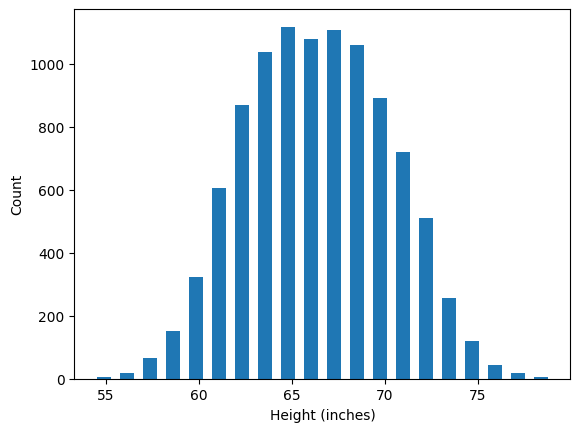

In [3]:
plt.hist(df.height, bins=20, rwidth=0.6)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()



> As it is clearly seen from the histogram, in df we have more than 1000 samples. For 60 in height we have almost 380 samples. So the y-axis shows the number of data and x-axis shows heights.


> This dataset is following a normal distribution.







---



**Checking Basic Statistics:**

In [4]:
df.height.min()

54.26313333

In [5]:
df.height.max()

78.99874235

In [6]:
df.height.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


**Comparing to a Normal Distribution:**

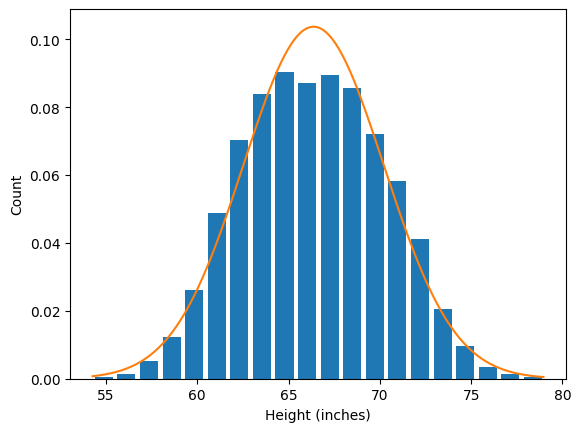

In [7]:
import numpy as np
from scipy.stats import norm

plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))



> This overlays a perfect normal distribution curve over our actual data. This helps visually assess how closely our data follows the normal distribution — which is crucial because the methods we use assume a normal distribution.





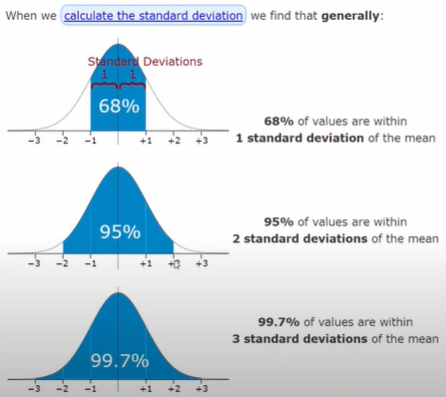

## **Method 1: Standard Deviation**

In statistics, we know:

    68% of the data is within ±1 standard deviation

    95% within ±2 std

    99.7% within ±3 std

So, any data point beyond ±3 std is extremely rare and we flag it as an outlier.

In [8]:
df.height.mean()

np.float64(66.367559754866)

In [9]:
df.height.std()

3.847528120795573

In [10]:
upper_limit = df.height.mean() + 3 * df.height.std()
upper_limit

np.float64(77.91014411725271)

In [11]:
lower_limit = df.height.mean() - 3 * df.height.std()
lower_limit

np.float64(54.824975392479274)

In [12]:
df[(df.height > upper_limit) | (df.height < lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [13]:
df_no_outlier_std_dev = df[(df.height > lower_limit) & (df.height < upper_limit)]
df_no_outlier_std_dev.shape

(9993, 2)



> This gives us a clean dataset without outliers.



In [14]:
df.shape[0] - df_no_outlier_std_dev.shape[0]

7



---



## **Method 2: Z-Score**

A z-Score tells us how far a value is from the mean in terms of standard deviations.
For example:

    Z = 0 → at the mean

    Z = 1 → 1 std above the mean

    Z = -2 → 2 std below the mean

    Z = 3 → 3 std above the mean

In [15]:
df['zscore'] = (df.height - df.height.mean()) / df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [16]:
(73.84 - 66.37) / 3.84

1.9453124999999998

In [17]:
df[df['zscore'] > 3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [18]:
df[df['zscore'] < -3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [19]:
df[(df.zscore < -3) | (df.zscore > 3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [20]:
df_no_outliers = df[(df.zscore > -3) & (df.zscore < 3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [21]:
df_no_outliers.shape

(9993, 3)

In [22]:
df.shape

(10000, 3)